<img src="ilustrations/analytics.gif" alt="Instagram" style="width: 300px;"/>
# Data Analytics
Kassio machado

**Road Map, Questions and Directions**
- Study the variations of geographic preference of city inhabitants. How it varies according to weather variables, such as **temperature and occurrences of rain and snow**.
- Create a model to classify the sets of places;
- Study the transitions betweens places, if there is effect of weather on them.

**Instructions for Development**
We have two basic methods of cell executions: stand-alone and batch, where the first represents the simple execution for visualization purposes, and the second for results exporting.
In pratical terms, the first is used for development and present results on in the notebook and the second to save figures in external files. Fo this reason, you must pay attention
to the flag saveFig present in some functions.

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import csv
import math
import json
import numpy
import colorama
import datetime
from tqdm import tqdm
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

In [3]:
RESET = colorama.Fore.RESET + colorama.Back.RESET
RED = colorama.Fore.YELLOW + colorama.Back.RED
BLUE = colorama.Fore.WHITE + colorama.Back.BLUE
GREEN = colorama.Fore.WHITE + colorama.Back.GREEN
print RED, 'Error Sample Message', RESET
print BLUE, 'Information Sample Message', RESET
print GREEN, 'Information Sample Message', RESET

 Error Sample Message 
 Information Sample Message 
 Information Sample Message 


# City

In [4]:
cities = ['New_York', 'Chicago', 'Istanbul']
cities += ['London', 'Paris', 'Sao_Paulo']
cities += ['Sydney', 'Tokyo']

In [5]:
city = 'Chicago'
print GREEN, city, RESET

 Chicago 


<img src="ilustrations/weather-icon.gif" alt="Instagram" style="width: 300px;"/>
# Weather
Source: Weather Underground - https://www.wunderground.com/weather/api/

In [6]:
weatherDir = 'data/weather/'
weatherFiles = {'New_York':'uweather-new_york.json', 
                'Chicago':'uweather-chicago.json', 
                'London':'uweather-london.json', 
                'Paris':'uweather-paris.json',
                'Sao_Paulo':'uweather-sao_paulo.json', 
                'Sydney':'uweather-sydney.json',
                'Tokyo':'uweather-tokyo.json',
               'Istanbul':'uweather-istanbul.json'}

In [7]:
def loadWeatherData(filename, dateKeyPattern='%y-%m-%d'):
    """
        Loads the weather data from JSON files imported from
        Weather Underground Source. It returns a dictionary of 
        indexed by dates (dateKeyPattern parameter) and 
        items are tuples of temperature (min, mean, max).
    """

    print BLUE, 'Loading', filename, RESET
    originalPattern = '%B %d, %Y'
    invalidSamples = 0
    weatherData = dict()
    inputfile = open(filename, 'r')
    for line in tqdm(inputfile, disable=True):
        data = json.loads(line.replace('\n', ''))
        dt = data['history']['date']['pretty']
        try:
            dt = datetime.datetime.strptime(dt, originalPattern)
        except ValueError:
            continue
        summary = data['history']['dailysummary'][0]
        try:
            tmin = float(summary['mintempm'])
            tmax = float(summary['maxtempm'])
            tmean = float(summary['meantempm'])
        except ValueError:
            invalidSamples += 1
            continue
        dtkey = dt.strftime(dateKeyPattern)
        weatherData[dtkey] = (tmin, tmean, tmax)
    if invalidSamples > 0:
        print RED, invalidSamples, 'Invalid samples', RESET
    print GREEN, 'Done!', RESET
    return weatherData

In [8]:
def plotWeatherTimeline(dataWeather, city, filename=None,
                        dateKeyPattern='%y-%m-%d'):
    """
        Plots the timeline of weather available on dataset files
        - showing min, mean and max temperatures daily.
    """
    timeline = sorted(dataWeather.keys())
    timeTicks = [datetime.datetime.strptime(t, dateKeyPattern) for t in timeline]
    plt.figure(figsize=(15,4))
    data = [dataWeather[t][1] for t in timeline]
    plt.plot(timeTicks, data, label='Mean', color='black', alpha=0.5)
    data = [dataWeather[t][0] for t in timeline]
    plt.plot(timeTicks, data, label='Min', color='blue', alpha=0.5)
    data = [dataWeather[t][2] for t in timeline]
    plt.plot(timeTicks, data, label='Max', color='red', alpha=0.5)
    plt.ylabel('Temperature ' + city, fontsize=15)
    plt.xticks(rotation='vertical', fontsize=15)
    plt.yticks(fontsize=15)
    plt.legend()
    plt.tight_layout()
    if filename != None:
        plt.savefig(filename, dpi=100)
    plt.show()
    return

In [9]:
def plotWeatherDetails(dataWeather, city, scale=5, saveFig=False):
    """
        Plots the histogram of temperatures rounded
        according to the scale paramenter. Additionally,
        it plots the histogram of daily difference of 
        min and max temperature registered daily and
        returns the details of temperature in dict.
    """
    details = dict()
    timeline = sorted(dataWeather.keys())
    dataRaw = [dataWeather[t][1] for t in timeline]
    data = [int(math.ceil(t/scale)*scale) for t in dataRaw]
    details['min'] = min(dataRaw)
    details['max'] = max(dataRaw)
    details['mean'] = numpy.mean(dataRaw)
    details['std'] = numpy.std(dataRaw)
    print GREEN + 'Temperatures (based on daily mean):'
    print 'Min:', details['min'], 'Max:', details['max']
    print 'Mean:', details['max'], 'STD:', details['std'], RESET
    
    plt.figure(figsize=(15,4))
    pdf, edges, = numpy.histogram(data, bins=range(-30, 45, scale))
    plt.bar(edges[:-1], pdf, width=scale - 0.1, alpha=0.8, label=city)
    plt.ylabel('Frequency', fontsize=14)
    plt.xlabel('Temperature', fontsize=14)
    plt.xticks(edges[:-1], fontsize=14)
    plt.yticks(fontsize=14)
    plt.legend(fontsize=14)
    plt.tight_layout()
    if saveFig:
        filename = 'results/weather-histogram-temperatures-'
        filename += city.upper() + '.png'
        plt.savefig(filename, dpi=100)
    plt.show()
    plt.clf()
    
    plt.figure(figsize=(15,4))
    data = [dataWeather[t][2] - dataWeather[t][1] for t in timeline]
    pdf, edges, = numpy.histogram(data, bins=range(0, 10, 1))
    plt.bar(edges[:-1], pdf, width=0.9, alpha=0.8, label=city, color='gray')
    meanDiff = numpy.mean(data)
    stdDiff = numpy.std(data)
    details['mean-diff'] = meanDiff
    details['std-diff'] = stdDiff
    plt.axvline(details['mean-diff'], color='black', alpha=0.7)
    plt.axvline(details['mean-diff'] + details['std-diff'], color='blue', alpha=0.7)
    plt.axvline(details['mean-diff'] - details['std-diff'], color='red', alpha=0.7)
    plt.title('Histogram of Daily Difference', fontsize=14)
    plt.ylabel('Frequency', fontsize=14)
    plt.xlabel('Temperature Difference (Daily)', fontsize=14)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    plt.legend(fontsize=14)
    plt.tight_layout()
    if saveFig:
        filename = 'results/weather-histogram-differences-' 
        filename += city.upper() + '.png'
        plt.savefig(filename, dpi=100)
    plt.show()
    plt.clf()
    print GREEN, 'Daily Min-Max Variance:', details['mean-diff'], details['std-diff'], RESET
    return details

In [10]:
dataWeather = loadWeatherData(weatherDir + weatherFiles[city])

 Loading data/weather/uweather-chicago.json 
 Done! 


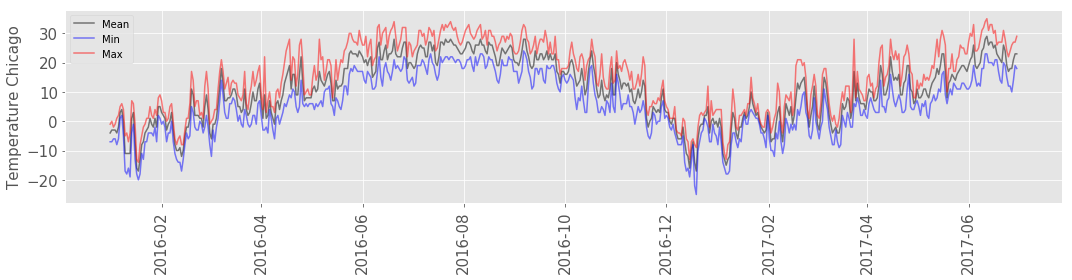

In [12]:
filename = 'figures/weather-timeline-' + city.upper() + '.png'
plotWeatherTimeline(dataWeather, city)

Temperatures (based on daily mean):
Min: -17.0 Max: 29.0
Mean: 29.0 STD: 10.6911436459 


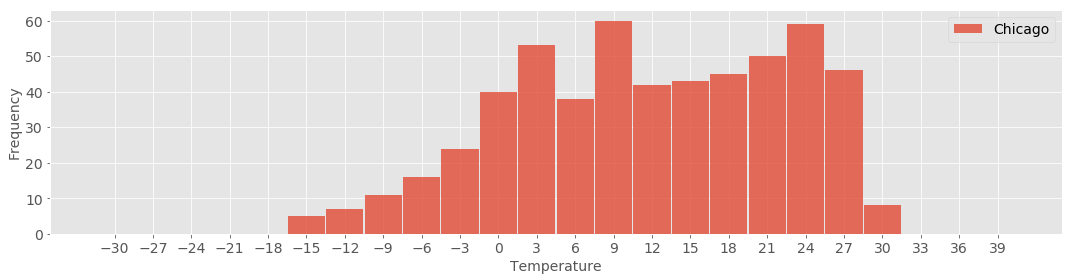

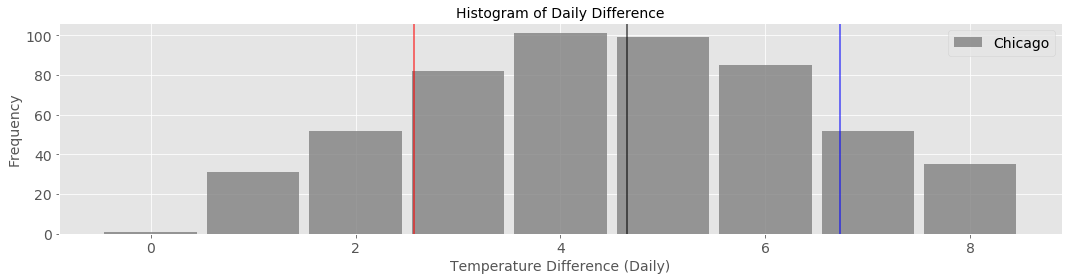

 Daily Min-Max Variance: 4.65265082267 2.07800515028 


In [13]:
weatherDetails = plotWeatherDetails(dataWeather, city, scale=3)

## Weather - Batch Execution
The cell bellow execute bunches of function/analysis for each target city 

In [ ]:
# Group all plots and results realted to weather.
weatherDetailsFile = open('results/weather-details.json', 'w')
for c in cities:
    dataWeather = loadWeatherData(weatherDir + weatherFiles[c])
    filename = 'results/weather-timeline-' + c.upper() + '.png'
    plotWeatherTimeline(dataWeather, c, filename, saveFig=True)
    weatherDetails = plotWeatherDetails(dataWeather, c, scale=3, saveFig=True)
    weatherDetails['city'] = c
    weatherDetailsFile.write(str(weatherDetails) + '\n')
weatherDetailsFile.close()    

## Weather - Dev Area
The codes in the cells bellow are analysis in development and not finished yet.

In [8]:
def loadSevereTemperatures(dataWeather, mode='mean'):
    """
        Search for differences of temperature that
        exceed the expected among two consecutive days.
        The mode parameter define if the functions evaluates
        the mean or max temperature of the day - requires the
        weather dataset previously loaded.
    """
    if mode == 'mean': 
        index = 1
    else:
        mode = 'max'
        index = 2
    timeline = sorted(dataWeather)
    diffs = list()
    for d1, d2 in zip(timeline, timeline[1:]):
        d = sorted([dataWeather[d1][index], dataWeather[d2][index]])
        dif = d[1] - d[0]
        data = (dif, d1, dataWeather[d1][index], d2, dataWeather[d2][index])
        diffs.append(data)

    data = [abs(d[0]) for d in diffs]
    stdDif = numpy.std(data)
    meanDif = numpy.mean(data)
    maxDiff = meanDif + stdDif
    print GREEN, 'Maximun Difference of', mode.upper(), 'Temp. among 2 consecutive days:', maxDiff, RESET

    diffs = sorted(diffs, key=lambda k:abs(k[0]), reverse=True)
    data = list()
    for dif in diffs:
        d = abs(dif[0])
        if d > maxDiff:
            data.append(dif)
    return data

dataMaxTemperatures = loadSevereTemperatures(dataWeather, 'max')

 Maximun Difference of MAX Temp. among 2 consecutive days: 4.26138800339 


<img src="ilustrations/instagram-icon.gif" alt="Instagram" style="width: 300px;"/>
# Social Media Data
Source: Instagram and Twitter

In [15]:
def loadInstagramFilenames(city):
    """
        Create the array of string of the filenames
        of the datasets.
    """
    filenames = list()
    baseFolder = 'data/'
    sufix = '-tweets-instagram-url-' + city.upper() + '.csv'
    dates = ['2016-06-16', '2016-07-11', '2016-08-05', 
                '2016-08-18', '2016-09-12', '2016-10-05', 
                '2016-11-07', '2016-12-04', '2016-12-14', 
                '2017-01-09', '2017-02-15', '2017-03-17',
                '2017-03-19', '2017-04-17', '2017-05-15']
    for d in dates:
        fname = baseFolder + d + sufix
        filenames.append(fname)
    print GREEN, 'Done!', RESET
    return filenames
instagramFiles = loadInstagramFilenames(city)

 Done! 


In [16]:
def loadInstagramURLs(inputfiles, completeName=True):
    """
        Loads the files of resolved urls which indicate the place
        where the photos were taken. It returns a dict where the keys
        are the id of tweet and items are the urls of places, 
        without the url base.
        The CSV files must be formated as following:
        id_sample, url_sample, url_place, place_name, user_name
        OBS: the url_place field can be 'not-available' in case 
        of the sample not avaible online anymore.
    """
    urlBase = 'https://www.instagram.com/explore/locations/'    
    dictSamples = dict()
    for filename in inputfiles:
        if completeName:
            filename = filename.replace('.csv', '-resolved.csv')
        f = open(filename, 'r')
        nlines = 0
        for i in f:
            nlines += 1
        f.seek(0)
        reader = csv.reader(f)
        for data in tqdm(reader, total=nlines, disable=True):
            if data[2] != 'not-available':
                urlPlace = data[2].replace(urlBase, '')
                placeName = data[3]
                dictSamples[data[0]] = (urlPlace, placeName)
        alias = filename.split('/')[-1]
        print BLUE, 'Load:', alias, len(dictSamples), 'Samples', RESET
    print GREEN, 'Done! Total Samples:', len(dictSamples), RESET
    return dictSamples

dataInstagramURL = loadInstagramURLs(instagramFiles)

 Load: 2016-06-16-tweets-instagram-url-CHICAGO-resolved.csv 56341 Samples 
 Load: 2016-07-11-tweets-instagram-url-CHICAGO-resolved.csv 116869 Samples 
 Load: 2016-08-05-tweets-instagram-url-CHICAGO-resolved.csv 139879 Samples 
 Load: 2016-08-18-tweets-instagram-url-CHICAGO-resolved.csv 189583 Samples 
 Load: 2016-09-12-tweets-instagram-url-CHICAGO-resolved.csv 237235 Samples 
 Load: 2016-10-05-tweets-instagram-url-CHICAGO-resolved.csv 252802 Samples 
 Load: 2016-11-07-tweets-instagram-url-CHICAGO-resolved.csv 301193 Samples 
 Load: 2016-12-04-tweets-instagram-url-CHICAGO-resolved.csv 312281 Samples 
 Load: 2016-12-14-tweets-instagram-url-CHICAGO-resolved.csv 354220 Samples 
 Load: 2017-01-09-tweets-instagram-url-CHICAGO-resolved.csv 413681 Samples 
 Load: 2017-02-15-tweets-instagram-url-CHICAGO-resolved.csv 469622 Samples 
 Load: 2017-03-17-tweets-instagram-url-CHICAGO-resolved.csv 528702 Samples 
 Load: 2017-03-19-tweets-instagram-url-CHICAGO-resolved.csv 528715 Samples 
 Load: 2017-0

In [17]:
def mergeInstagramData(inputfiles, dataInstagramURL):
    """
        Loads the original dataset files of samples' URLs and 
        combine the data with resolved URLs csv files. 
        Requires the preloaded data from resolved URLS.
        The CSV files must be formated as following:
        id_sample, id_user, ISO Alpha-2, url_sample, twitter_url_place, twitter_place_name, UTC Date & Time
    """
    dataInstagram = dict()
    for filename in inputfiles:
        alias = filename.split('/')[-1]
        print BLUE, 'Load:', alias, RESET
        f = open(filename, 'r')
        nlines = 0
        for i in f:
            nlines += 1
        f.seek(0)
        reader = csv.reader(f)
        for data in tqdm(reader, total=nlines, disable=True):
            try:
                urlPlace, placeName = dataInstagramURL[data[0]]
            except KeyError:
                # KeyError in case of sample not available or not resolved
                continue
            except ValueError:
                # ValueError in case of duplicated sample lines
                continue
            try:
                dataInstagram[data[0]] = (data[6], urlPlace, placeName, data[1])
                # (dateTime, urlPlace, placeName, idUser)
            except IndexError:
                print RED, 'CORRUPTED LINE!', RESET
                print data
                return
    print GREEN, 'Done!', RESET
    return dataInstagram

dataInstagram = mergeInstagramData(instagramFiles, dataInstagramURL)

 Load: 2016-06-16-tweets-instagram-url-CHICAGO.csv 
 Load: 2016-07-11-tweets-instagram-url-CHICAGO.csv 
 Load: 2016-08-05-tweets-instagram-url-CHICAGO.csv 
 Load: 2016-08-18-tweets-instagram-url-CHICAGO.csv 
 Load: 2016-09-12-tweets-instagram-url-CHICAGO.csv 
 Load: 2016-10-05-tweets-instagram-url-CHICAGO.csv 
 Load: 2016-11-07-tweets-instagram-url-CHICAGO.csv 
 Load: 2016-12-04-tweets-instagram-url-CHICAGO.csv 
 Load: 2016-12-14-tweets-instagram-url-CHICAGO.csv 
 Load: 2017-01-09-tweets-instagram-url-CHICAGO.csv 
 Load: 2017-02-15-tweets-instagram-url-CHICAGO.csv 
 Load: 2017-03-17-tweets-instagram-url-CHICAGO.csv 
 Load: 2017-03-19-tweets-instagram-url-CHICAGO.csv 
 Load: 2017-04-17-tweets-instagram-url-CHICAGO.csv 
 Load: 2017-05-15-tweets-instagram-url-CHICAGO.csv 
 Done! 


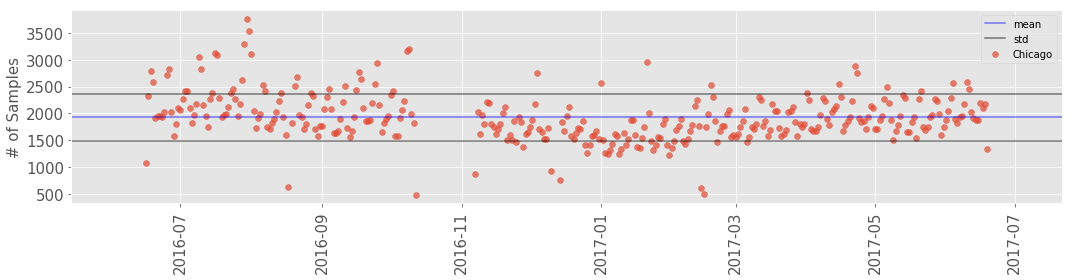

In [18]:
def plotInstagramTimeline(dataInstagram, city, filename=None):
    data = dict()
    for i in dataInstagram:
        sample = dataInstagram[i]
        dt = sample[0].split(' ')[0]
        try:
            data[dt].add(i)
        except KeyError:
            data[dt] = {i}
    timeline = sorted(data)
    datapoints = [len(data[i]) for i in timeline]
    mean = numpy.mean(datapoints)
    std = numpy.std(datapoints)
    timeline = [datetime.datetime.strptime(t, '%y-%m-%d') for t in timeline]
    plt.figure(figsize=(15,4))
    plt.scatter(timeline, datapoints, alpha=0.7, label=city)
    plt.axhline(mean, alpha=0.5, color='blue', label='mean')
    plt.axhline(mean + std, alpha=0.5, color='black', label='std')
    plt.axhline(mean - std, alpha=0.5, color='black')
    plt.ylabel('# of Samples', fontsize=15)
    plt.xticks(rotation='vertical', fontsize=15)
    plt.yticks(fontsize=15)
    plt.legend()
    plt.tight_layout()
    if filename != None:
        plt.savefig(filename, dpi=100)
    plt.show()
    return

plotInstagramTimeline(dataInstagram, city)  

Loading: 100%|██████████| 655305/655305 [00:00<00:00, 830697.64it/s]


[1, 1, 1, 1, 1] [5105, 5356, 9832, 10361, 113257]


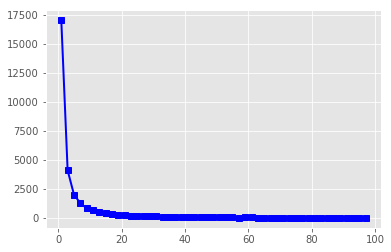

In [19]:
def plotSamplesDistribution(dataInstagram):
    dataPlaces = dict()
    for k in tqdm(dataInstagram, 'Loading'):
        placeid = dataInstagram[k][1]
        try:
            dataPlaces[placeid] += 1
        except KeyError:
            dataPlaces[placeid] = 1
    data = sorted(dataPlaces.values())
    print data[:5], data[-5:]
    # data = normalizeMax(data)
    pdf, edges = numpy.histogram(data, bins=range(1, 100, 2))
    s = float(sum(pdf))
    probs = [i/s for i in pdf]
    cdf = numpy.cumsum(probs)
    ccdf = 1 - cdf
    plt.plot(edges[:-1], pdf, '-sb', linewidth=2, label='Samples')
    plt.show()
    
    
    return

plotSamplesDistribution(dataInstagram)        

In [18]:
dataInstagram.values()[:5]

[('17-02-06 16:26:38',
  '217950522/valley-stream-new-york/',
  'Valley Stream; New York',
  '4569469277'),
 ('17-04-03 16:41:47',
  '212988663/new-york-new-york/',
  'New York; New York',
  '1275569641'),
 ('17-06-07 10:53:50',
  '215169478/hudson-river-park/',
  'Hudson River Park',
  '7662652'),
 ('17-05-14 13:39:40',
  '875297726/kipnis-studio-standard-kss-nyc/',
  'Kipnis Studio Standard - Kss - Nyc',
  '22077637'),
 ('17-04-21 20:06:43',
  '974833/new-york-marriott-at-the-brooklyn-bridge/',
  'New York Marriott At The Brooklyn Bridge',
  '21314314')]

In [ ]:
for c in cities:
    # dataWeather = loadWeatherData(weatherDir + weatherFiles[c])
    instagramFiles = loadInstagramFilenames(c)
    dataInstagramURL = loadInstagramURLs(instagramFiles)
    dataInstagram = mergeInstagramData(instagramFiles, dataInstagramURL)
    # filename = 'results/social-timeline-' + c.upper() + '.png'
    # plotInstagramTimeline(dataInstagram, c, filename)
    
weatherDetailsFile.close()    

# Analytics

In [20]:
def normalizeMax(data, maxValue=None):
    if maxValue == None:
        maxValue = max(data)
    values = list()
    maxValue = float(maxValue)
    for x in data:
        try:
            v = x/maxValue
        except ZeroDivisionError:
            v = 0
        values.append(v)
    return values

In [21]:
def groupSamplesSpatioTemporal(dataInstagram, dateKeyFormat='%y-%m-%d'):
    """
        Loads the samples from dataInstagram and group them
        according to the place-url and dateKeyFormat.
        In other words: it returns a dict indexed by date 
        and followed by places urls, where the items represent
        the ammount of samples.
    """
    dataTimeline = dict()
    for i in tqdm(dataInstagram, 'Grouping'):
        sample = dataInstagram[i]
        dateKey = sample[0].split(' ')[0]
        placeURL = sample[1]
        try:
            dataTimeline[dateKey][placeURL] += 1
        except KeyError:
            if dateKey not in dataTimeline:
                dataTimeline[dateKey] = dict()
            dataTimeline[dateKey][placeURL] = 1
    return dataTimeline

dataSpatiotemporal = groupSamplesSpatioTemporal(dataInstagram)

Grouping: 100%|██████████| 655305/655305 [00:01<00:00, 342051.29it/s]


In [22]:
def loadTopPopularityPlaces(dataInstagram, top=100):
    dataPlaces = dict()
    for n in dataInstagram:
        sample = dataInstagram[n]
        try:
            dataPlaces[sample[1]] += 1
        except KeyError:
            dataPlaces[sample[1]] = 1
    print GREEN, '# of Places:', len(dataPlaces), RESET
    print GREEN, 'Done!', RESET
    return dataPlaces
dataTopPlaces = loadTopPopularityPlaces(dataInstagram)

 # of Places: 31193 
 Done! 


# Top Places

In [23]:
topPlaces = sorted(dataTopPlaces.keys(), key=lambda k:dataTopPlaces[k], reverse=True)
for i, p in enumerate(topPlaces[:10]):
    print i + 1, p.split('/')[1], dataTopPlaces[p]

1 chicago-illinois 113257
2 wrigley-field 10361
3 chicago-ohare-international-airport 9832
4 west-side-chicago 5356
5 millennium-park 5105
6 united-center 4576
7 the-art-institute-of-chicago 4223
8 navy-pier 4167
9 south-side-chicago 3355
10 soldier-field 3248


 Weather Tipping Point 10.6928702011 
 Tipping Point Set of Places:
BEFORE 17209 places
AFTER 25638 places
Intersection 11654 places
Intersec. Samples: 91 % 


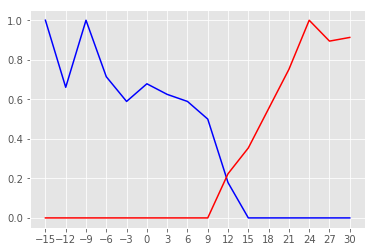

In [24]:
def plotWeatherTippingPoint(dataWeather, weatherDetails, dataSpatiotemporal, topPlaces):
    """
        ...
    """
    PHASES = ['BEFORE', 'AFTER']
    tp = weatherDetails['mean']
    print BLUE, 'Weather Tipping Point', tp, RESET
    topPlaces = set(topPlaces)
    dataPhases = dict()
    dataTipping = dict()
    for k in PHASES:
        dataPhases[k] = dict()
        dataTipping[k] = set()
    
    for dateKey in dataSpatiotemporal:
        temp = dataWeather[dateKey][1]
        k = PHASES[0] if temp <= tp else PHASES[1]
        dataTipping[k].update(topPlaces.intersection(dataSpatiotemporal[dateKey].keys()))
    
    intersection = dataTipping[PHASES[0]].intersection(dataTipping[PHASES[1]])
    totalSamples = sum([sum(dataSpatiotemporal[d].values()) for d in dataSpatiotemporal])
    intersectSamples = 0
    for dateKey in dataSpatiotemporal:
        for p in intersection:
            try:
                intersectSamples += dataSpatiotemporal[dateKey][p]
            except KeyError:
                continue
                
    print GREEN, 'Tipping Point Set of Places:'
    print PHASES[0], len(dataTipping[PHASES[0]]), 'places'
    print PHASES[1], len(dataTipping[PHASES[1]]), 'places'
    print 'Intersection', len(intersection), 'places'
    perc = int((intersectSamples/float(totalSamples)) * 100)
    print 'Intersec. Samples:', perc, '%', RESET
    dataTipping[PHASES[0]].difference_update(intersection)
    dataTipping[PHASES[1]].difference_update(intersection)
    
    scale = 3
    tempCounter = dict()
    for dateKey in dataSpatiotemporal:
        temp = dataWeather[dateKey][1]
        temp = int(math.ceil(temp/scale)*scale)
        for k in PHASES:
            n = 0
            for p in dataTipping[k]:
                try:
                    n += dataSpatiotemporal[dateKey][p]
                except KeyError:
                    continue
            try:
                dataPhases[k][temp] += n # we can divide by # of instances of temp
                tempCounter[temp] += 1
            except KeyError:
                dataPhases[k][temp] = n
                tempCounter[temp] = 1
        
    ticks = sorted(dataPhases[PHASES[0]])
    data = [dataPhases[PHASES[0]][t]/tempCounter[t] for t in ticks] # normalizing
    data = normalizeMax(data, max(data))
    plt.plot(ticks, data, color='blue')
    data = [dataPhases[PHASES[1]][t]/tempCounter[t] for t in ticks]
    data = normalizeMax(data, max(data))
    plt.plot(ticks, data, color='red')
    plt.xticks(ticks)
    plt.show()
        
    return
plotWeatherTippingPoint(dataWeather, weatherDetails, dataSpatiotemporal, topPlaces)

<img src="ilustrations/noidea.gif" alt="Instagram" style="width: 300px;"/>
# Area of Tests

Don't take this codes so setious, seriously!

In [25]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

Temperature Spectrum [-15, -10, -5, 0, 5, 10, 15, 20, 25, 30]
[ 0.2093279   0.11899825  0.11547489  0.09090364  0.08751178  0.08378311
  0.08012474  0.07766374  0.07123455  0.0649774 ]
[ 0.2093279   0.32832615  0.44380103  0.53470467  0.62221645  0.70599956
  0.7861243   0.86378804  0.9350226   1.        ]


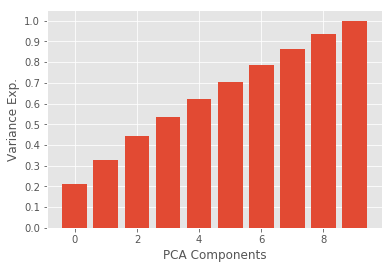

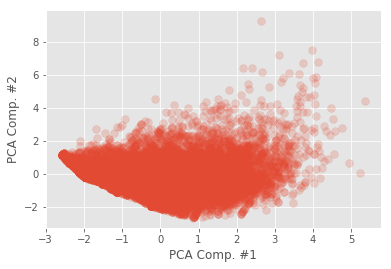

In [41]:
def loadPCA(dataSpatiotemporal, dataWeather, topPlaces, roundFactor=5):
    tempSpectrum = set()
    dataPCA = dict()
    for dateKey in dataSpatiotemporal:
        temp = dataWeather[dateKey][1]
        temp = int(math.ceil(temp/roundFactor)*roundFactor)
        tempSpectrum.add(temp)
        for p in dataSpatiotemporal[dateKey]:
            try:
                dataPCA[p][temp] += dataSpatiotemporal[dateKey][p]
            except:
                if p not in dataPCA:
                    dataPCA[p] = dict()
                dataPCA[p][temp] = dataSpatiotemporal[dateKey][p]

    tempSpectrum = sorted(tempSpectrum)
    print 'Temperature Spectrum', tempSpectrum
    for p in dataPCA:
        s = list()
        for t in tempSpectrum:
            try:
                s.append(dataPCA[p][t])
            except KeyError:
                s.append(0)
        dataPCA[p] = normalizeMax(s, max(s))
        
    pcadata = [dataPCA[p] for p in topPlaces[:10000]]
    x = scale(pcadata)
    pca = PCA(n_components=len(tempSpectrum))
    pca.fit(x)
    var = pca.explained_variance_ratio_
    c = numpy.cumsum(pca.explained_variance_ratio_)
    print pca.explained_variance_ratio_
    print c
    plt.figure()
    plt.bar(range(len(c)), c, linewidth=1) 
    plt.yticks(numpy.arange(0, 1.1, 0.1))
    plt.xlabel('PCA Components')
    plt.ylabel('Variance Exp.')
    xt = pca.transform(x)
    plt.figure()
    plt.scatter(xt[:,0], xt[:,1], s=60, alpha=0.2)
    plt.xlabel('PCA Comp. #1')
    plt.ylabel('PCA Comp. #2')
    return pcadata

dataPCA = loadPCA(dataSpatiotemporal, dataWeather, topPlaces)

Temperature Spectrum [-15, -10, -5, 0, 5, 10, 15, 20, 25, 30]
Place Spectrum 31193
 Variance Explained:
[  2.98929142e-01   2.00504181e-01   1.43633155e-01   1.19603638e-01
   6.69751597e-02   5.48809757e-02   4.35420118e-02   3.65028503e-02
   3.54288863e-02   5.41931881e-32]
[ 0.29892914  0.49943332  0.64306648  0.76267012  0.82964528  0.88452625
  0.92806826  0.96457111  1.          1.        ] 


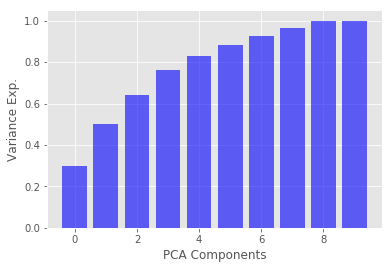

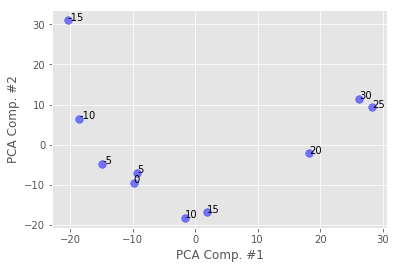

In [45]:
def loadPCA(dataSpatiotemporal, dataWeather, topPlaces, roundFactor=5):
    dataPCA = dict()
    tempSpectrum = set()
    placesSpectrum = set()    
    
    for dateKey in dataSpatiotemporal:
        temp = dataWeather[dateKey][1]
        temp = int(math.ceil(temp/roundFactor)*roundFactor)
        tempSpectrum.add(temp)
        placesSpectrum.update(dataSpatiotemporal[dateKey].keys())
        for p in dataSpatiotemporal[dateKey]:
            try:
                dataPCA[temp][p] += dataSpatiotemporal[dateKey][p]
            except:
                if temp not in dataPCA:
                    dataPCA[temp] = dict()
                dataPCA[temp][p] = dataSpatiotemporal[dateKey][p]

    tempSpectrum = sorted(tempSpectrum)
    placesSpectrum = sorted(placesSpectrum)
    print 'Temperature Spectrum', tempSpectrum
    print 'Place Spectrum', len(placesSpectrum)
    for t in dataPCA:
        s = list()
        for p in topPlaces[:1000]: #placesSpectrum:
            try:
                s.append(dataPCA[t][p])
            except KeyError:
                s.append(0)
        dataPCA[t] = normalizeMax(s, max(s))
        
    pcadata = [dataPCA[t] for t in sorted(dataPCA)]
    x = scale(pcadata)
    pca = PCA(n_components=len(tempSpectrum))
    pca.fit(x)
    var = pca.explained_variance_ratio_
    c = numpy.cumsum(pca.explained_variance_ratio_)
    print GREEN, 'Variance Explained:'
    print pca.explained_variance_ratio_
    print c, RESET
    plt.figure()
    plt.bar(range(len(c)), c, linewidth=1, color='blue', alpha=0.6)
    plt.xlabel('PCA Components')
    plt.ylabel('Variance Exp.')
    xt = pca.transform(x)
    plt.figure()
    plt.scatter(xt[:,0], xt[:,1], c='blue', s=60, alpha=0.5)
    plt.xlabel('PCA Comp. #1')
    plt.ylabel('PCA Comp. #2')
    for x, y, t in zip(xt[:,0], xt[:,1], sorted(dataPCA)):
        plt.annotate(t, xy=(x, y), xytext=(x, y))
    return pcadata

dataPCA = loadPCA(dataSpatiotemporal, dataWeather, topPlaces)

In [ ]:
def loadPCA(dataSpatiotemporal, dataWeather, topPlaces, roundFactor=5):
    dataPCA = dict()
    tempSpectrum = set()
    placesSpectrum = set()    
    
    for dateKey in dataSpatiotemporal:
        temp = dataWeather[dateKey][1]
        temp = int(math.ceil(temp/roundFactor)*roundFactor)
        tempSpectrum.add(temp)
        placesSpectrum.update(dataSpatiotemporal[dateKey].keys())
        for p in dataSpatiotemporal[dateKey]:
            try:
                dataPCA[temp][p] += dataSpatiotemporal[dateKey][p]
            except:
                if temp not in dataPCA:
                    dataPCA[temp] = dict()
                dataPCA[temp][p] = dataSpatiotemporal[dateKey][p]

    tempSpectrum = sorted(tempSpectrum)
    placesSpectrum = sorted(placesSpectrum)
    print 'Temperature Spectrum', tempSpectrum
    print 'Place Spectrum', len(placesSpectrum)
    for t in dataPCA:
        s = list()
        for p in topPlaces[:1000]: #placesSpectrum:
            try:
                s.append(dataPCA[t][p])
            except KeyError:
                s.append(0)
        dataPCA[t] = normalizeMax(s, max(s))
        
    pcadata = [dataPCA[t] for t in sorted(dataPCA)]
    x = scale(pcadata)
    pca = PCA(n_components=len(tempSpectrum))
    pca.fit(x)
    var = pca.explained_variance_ratio_
    c = numpy.cumsum(pca.explained_variance_ratio_)
    return c

dataPCA = loadPCA(dataSpatiotemporal, dataWeather, topPlaces)

In [ ]:
dataWeather = loadWeatherData(weatherFiles[0])



































